### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

### Dataset Preparation

In [2]:
dataset_path = "diabetes_scale.svm"
X, y = load_svmlight_file(dataset_path)
X = X.toarray()

In [3]:
print(X[:5, :])
print(y[:5])

[[-0.294118    0.487437    0.180328   -0.292929   -1.          0.00149028
  -0.53117    -0.0333333 ]
 [-0.882353   -0.145729    0.0819672  -0.414141   -1.         -0.207153
  -0.766866   -0.666667  ]
 [-0.0588235   0.839196    0.0491803  -1.         -1.         -0.305514
  -0.492741   -0.633333  ]
 [-0.882353   -0.105528    0.0819672  -0.535354   -0.777778   -0.162444
  -0.923997   -1.        ]
 [-1.          0.376884   -0.344262   -0.292929   -0.602837    0.28465
   0.887276   -0.6       ]]
[-1.  1. -1.  1. -1.]


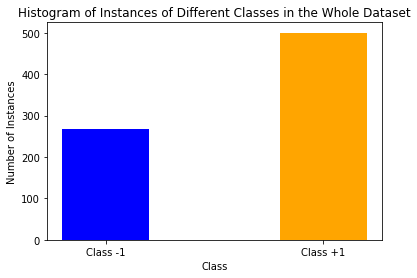

In [4]:
unique, counts = np.unique(y, return_counts=True)

plt.bar(unique, counts, tick_label=['Class -1', 'Class +1'], color=['blue', 'orange'])
plt.title('Histogram of Instances of Different Classes in the Whole Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Instances')

plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [6]:
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (691, 8), X_test: (77, 8), y_train: (691,), y_test: (77,)


In [7]:
print(X_train[:5, :])
print(y_train[:5])

[[-0.882353   0.447236   0.344262  -0.0707071 -0.574468   0.374069
  -0.780529  -0.166667 ]
 [-0.411765   0.125628   0.0819672 -1.        -1.         0.126677
  -0.843723  -0.333333 ]
 [-1.         0.0251256  0.278689  -0.191919  -0.787234   0.028316
  -0.863365  -0.9      ]
 [-0.647059   0.58794    0.0491803 -0.737374  -0.0851064 -0.0700447
  -0.814688  -0.9      ]
 [-1.         0.21608    0.0819672 -0.393939  -0.609929   0.0223547
  -0.893254  -0.6      ]]
[-1. -1.  1.  1. -1.]


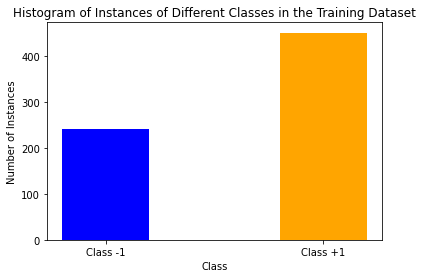

In [8]:
unique, counts = np.unique(y_train, return_counts=True)

plt.bar(unique, counts, tick_label=['Class -1', 'Class +1'], color=['blue', 'orange'])
plt.title('Histogram of Instances of Different Classes in the Training Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Instances')

plt.show()

### Training

In [9]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'penalty': ['l2', 'l1', 'elasticnet', None],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'fit_intercept': [True, False],
    'max_iter': [1000, 2000, 3000],
    'tol': [1e-3, 1e-4, 1e-5]
}

In [10]:
perceptron = Perceptron()

grid_search = GridSearchCV(estimator=perceptron, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END alpha=0.0001, fit_intercept=True, max_iter=1000, penalty=l2, tol=0.001; total time=   0.0s
[CV] END alpha=0.0001, fit_intercept=True, max_iter=1000, penalty=l2, tol=0.0001; total time=   0.0s
[CV] END alpha=0.0001, fit_intercept=True, max_iter=1000, penalty=l2, tol=0.0001; total time=   0.0s
[CV] END alpha=0.0001, fit_intercept=True, max_iter=1000, penalty=l2, tol=1e-05; total time=   0.0s
[CV] END alpha=0.0001, fit_intercept=True, max_iter=1000, penalty=l2, tol=1e-05; total time=   0.0s
[CV] END alpha=0.0001, fit_intercept=True, max_iter=1000, penalty=l2, tol=1e-05; total time=   0.0s
[CV] END alpha=0.0001, fit_intercept=True, max_iter=1000, penalty=l2, tol=1e-05; total time=   0.0s
[CV] END alpha=0.0001, fit_intercept=True, max_iter=1000, penalty=l2, tol=1e-05; total time=   0.0s
[CV] END alpha=0.0001, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.001; total time=   0.0s
[CV] END alpha=0.0001, fit_interce

GridSearchCV(cv=5, estimator=Perceptron(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 2000, 3000],
                         'penalty': ['l2', 'l1', 'elasticnet', None],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='accuracy', verbose=2)

In [12]:
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Get the best estimator
best_perceptron = grid_search.best_estimator_

# Make predictions on the test data with the best model
y_pred = best_perceptron.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best hyperparameters: {'alpha': 0.0001, 'fit_intercept': False, 'max_iter': 1000, 'penalty': 'l2', 'tol': 0.001}
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.52      0.93      0.67        27
         1.0       0.93      0.54      0.68        50

    accuracy                           0.68        77
   macro avg       0.73      0.73      0.68        77
weighted avg       0.79      0.68      0.68        77

